In [2]:
import pandas as pd
import numpy as np
import torch
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import torch
from torch import nn
from torchsummary import summary
from torch.utils.data import TensorDataset,DataLoader
from torch.optim.lr_scheduler import StepLR


from matplotlib.pyplot import MultipleLocator


d:\programfilesssd2\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\programfilesssd2\miniconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\programfilesssd2\miniconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import matplotlib
matplotlib.matplotlib_fname()


'd:\\programfilesssd2\\miniconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

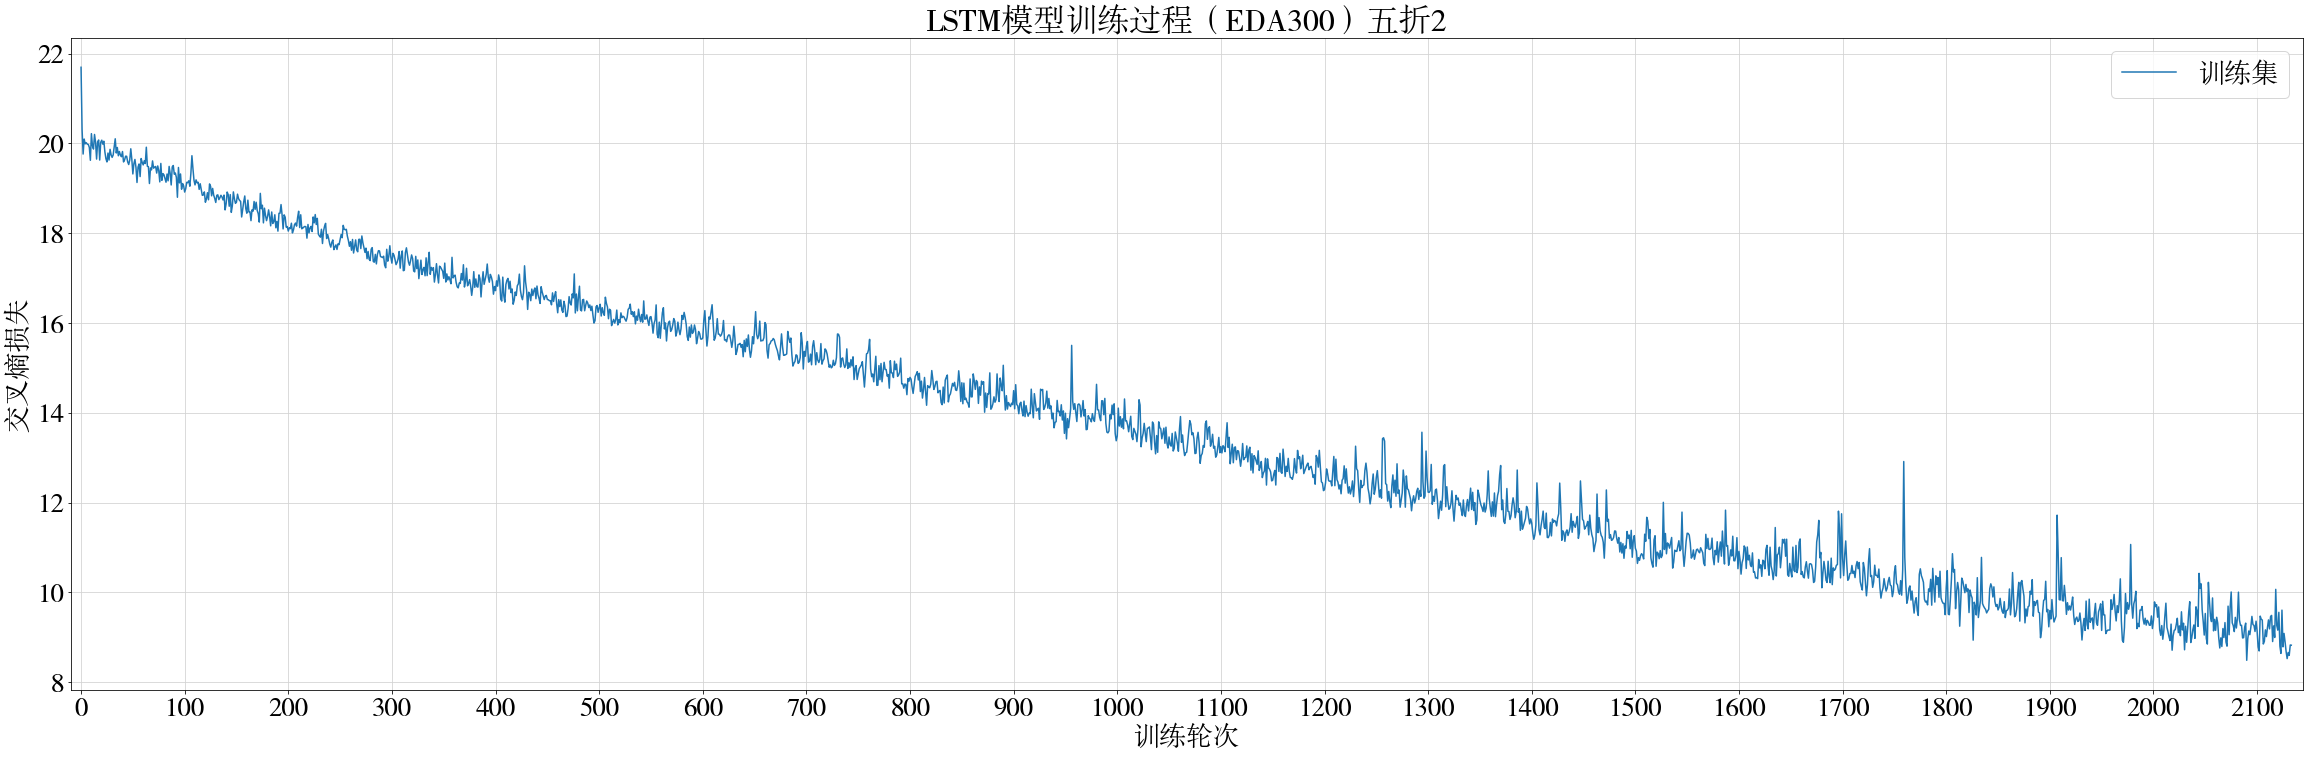

In [7]:
plt.figure(figsize=(40, 12))
fontsize = 27
plt.rcParams['font.size'] = str(fontsize)

plt.rcParams['font.family'] = 'HGSS_CNKI'


fold =2

# OBJ = pd.read_pickle("loss_CNN_EDG300_5("+str(fold)+").pkl")
# plt.title('CNN模型训练过程（EDA300+PPG300融合）五折'+str(fold),fontsize=fontsize+5)

OBJ = pd.read_pickle("./项目文件/loss_LSTM_EDA300_5("+str(fold)+").pkl")
plt.title('LSTM模型训练过程（EDA300）五折'+str(fold),fontsize=fontsize+5)


OBJname = "训练集"

plt.xlabel("训练轮次",size=fontsize)
plt.ylabel("交叉熵损失",size=fontsize)



plt.xlim(-10, len(OBJ["loss"])+10)
plt.plot(np.array(OBJ["loss"]),label=OBJname)
plt.legend(fontsize=fontsize)
# plt.plot(savgol_filter(np.array(pd.read_pickle("model_CNN_EDA300_10.pkl")["trainAccHis"])+0.1, 11, 3))
plt.grid(color="lightgray")

x_major_locator = MultipleLocator(100)
# 创建y轴定位器，间隔5

 
# 获取轴对象
ax = plt.gca()
# 设置x轴的间隔
ax.xaxis.set_major_locator(x_major_locator)
# 设置y轴的间隔

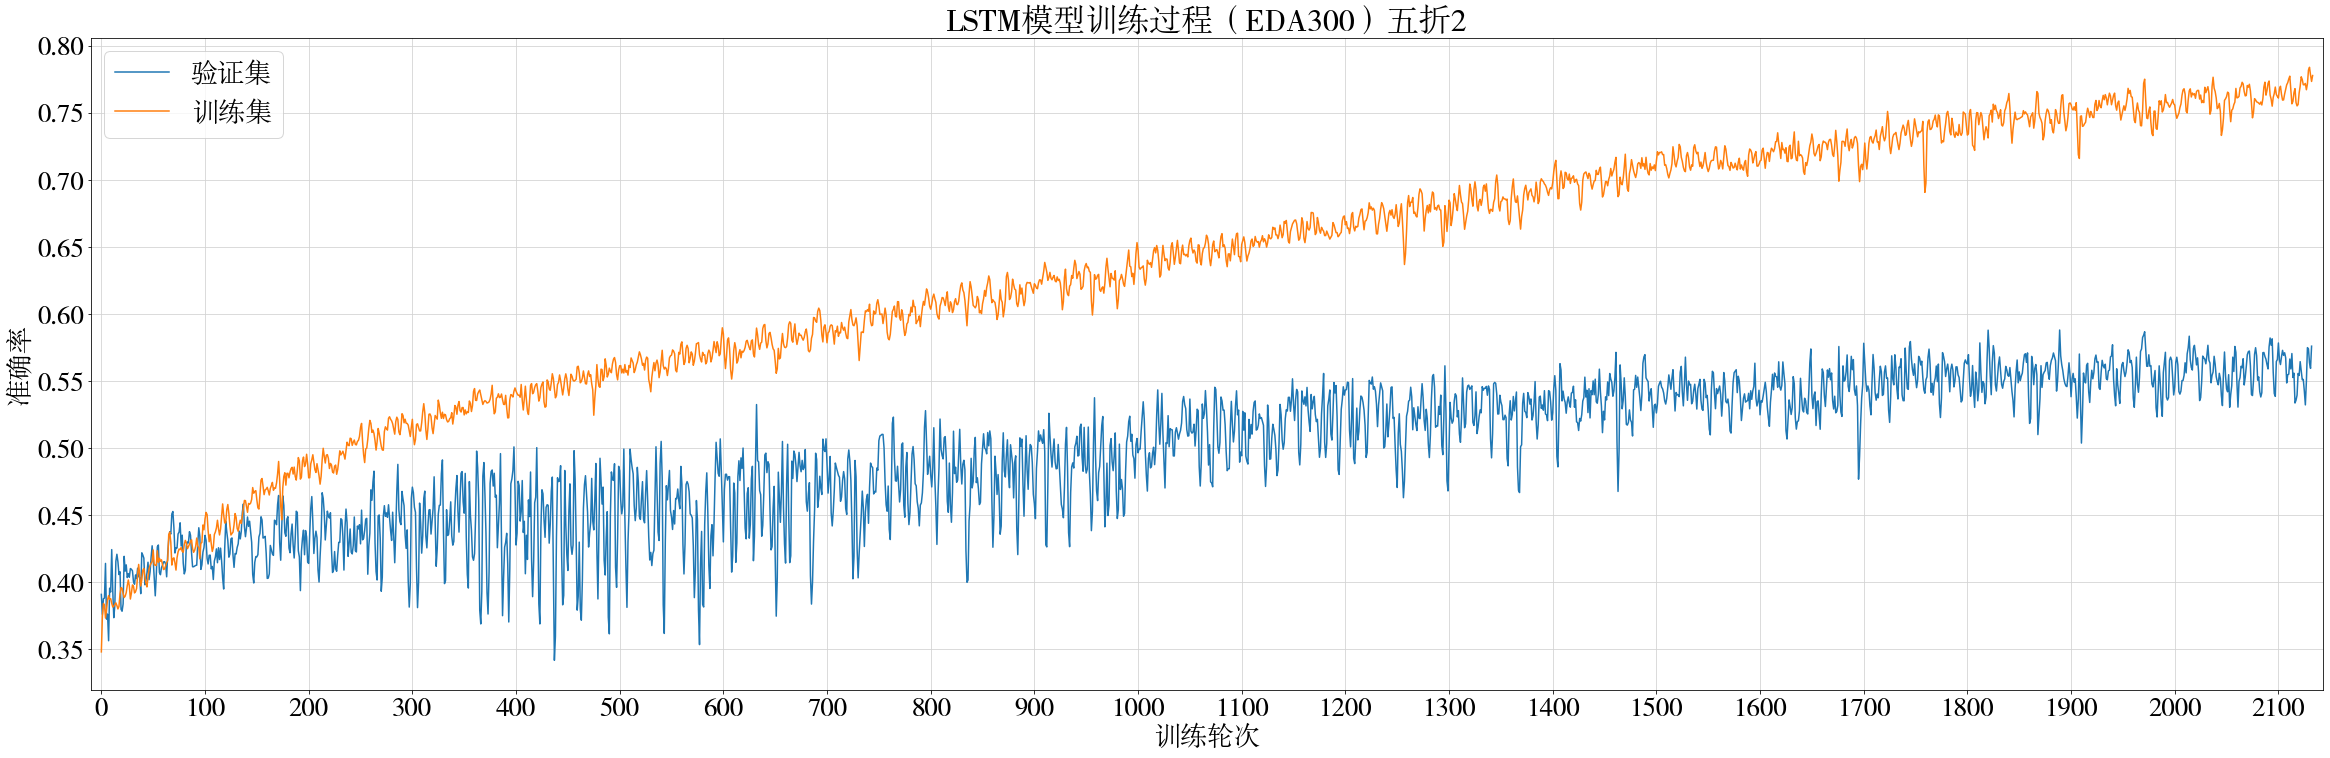

In [11]:
plt.figure(figsize=(40, 12))
fontsize = 27
plt.rcParams['font.size'] = str(fontsize)

plt.rcParams['font.family'] = 'HGSS_CNKI'

fold = 2


OBJ = pd.read_pickle("./项目文件/loss_LSTM_EDA300_5("+str(fold)+").pkl")
plt.title('LSTM模型训练过程（EDA300）五折'+str(fold),fontsize=fontsize+5)
plt.xlabel("训练轮次",size=fontsize)
plt.ylabel("准确率",size=fontsize)


plt.xlim(-10, len(OBJ["acc"])+10)


plt.plot(savgol_filter(np.array(OBJ["acc"])+0.00, 5, 3),label="验证集")
# plt.plot((np.array(OBJ["acc"])+0.0),label="验证集")

# plt.plot((np.array(OBJ["trainAccHis"])),label="训练集")
plt.plot(savgol_filter(np.array(OBJ["trainAccHis"])+0.0, 5, 3),label="训练集")
plt.legend(fontsize=fontsize)
plt.grid(color="lightgray")

x_major_locator = MultipleLocator(100)
# 创建y轴定位器，间隔5
y_major_locator = MultipleLocator(0.05)
 
# 获取轴对象
ax = plt.gca()
# 设置x轴的间隔
ax.xaxis.set_major_locator(x_major_locator)
# 设置y轴的间隔
ax.yaxis.set_major_locator(y_major_locator)


In [5]:
TARGET = "CNN_PPG300+EDA"
for fold in [1,2,3,4,5]:
    print(fold)
    print(len(pd.read_pickle("./项目文件/loss_"+TARGET+"300_5("+str(fold)+").pkl")["acc"]))
    print(max(pd.read_pickle("./项目文件/loss_"+TARGET+"300_5("+str(fold)+").pkl")["acc"]))
    print(max(pd.read_pickle("./项目文件/loss_"+TARGET+"300_5("+str(fold)+").pkl")["trainAccHis"]))

1
300
0.9583333333333334
tensor(0.9914)
2
300
0.9528985507246377
tensor(0.9932)
3
300
0.9692028985507246
tensor(0.9941)
4
300
0.9655797101449275
tensor(0.9864)
5
300
0.9637681159420289
tensor(0.9928)
